In [ ]:
!rm -rf * .* 2>/dev/null
!rm -rf ~/.kaggle && mkdir ~/.kaggle
!echo eyJ1c2VybmFtZSI6InB2dHNlYzB4MSIsImtleSI6IjZlOTYxZmMxYjdhYzU2OTlmNzcwYmFjMjI1NTk4MWIwIn0= | base64 -d > ~/.kaggle/kaggle.json
!git clone https://github.com/Reshmavineesh/SunLit-Segmentation .
%cd FRRN-A
!./download_dataset.sh
from IPython.display import clear_output; clear_output()
print("Dataset ready")

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
from src import utils
import tensorflow as tf

image_path = 'dataset/dataset_tomato/color_images/'
mask_path = 'dataset/dataset_tomato/masks/'
n_train = 600
n_test = 200

train_images, train_masks, test_images, test_masks = utils.load_dataset(image_path, mask_path, n_train, n_test)
print(f"Train Images:\t{train_images.shape}")
print(f"Train Masks:\t{train_masks.shape}")
print(f"Test Images:\t{test_images.shape}")
print(f"Test Masks:\t{test_masks.shape}")

In [4]:
from src.frrna import FRRNA
from tensorflow.keras.callbacks import EarlyStopping


EPOCHS = 300
LEARNING_RATE = 5e-7
BATCH_SIZE = 12
early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
loss=utils.binary_cross_entropy
metrics = ['accuracy']
input_shape = train_images.shape[1:]

train_attr = {
    "lr": LEARNING_RATE,
    "batch_size": BATCH_SIZE,
    "optimizer": optimizer.get_config()['name'],
    "loss_fn": loss.get_config()['name']
}

model = FRRNA(input_shape)
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(train_images,
                    train_masks,
                    validation_split = 0.25,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks=[early_stopper])

38/38 [==============================] - 23s 603ms/step - loss: 0.4000 - accuracy: 0.7803 - val_loss: 0.4369 - val_accuracy: 0.7636
Epoch 122/300
38/38 [==============================] - 23s 603ms/step - loss: 0.3995 - accuracy: 0.7803 - val_loss: 0.4367 - val_accuracy: 0.7633
Epoch 123/300
38/38 [==============================] - 23s 602ms/step - loss: 0.4003 - accuracy: 0.7799 - val_loss: 0.4363 - val_accuracy: 0.7636
Epoch 124/300
38/38 [==============================] - 23s 603ms/step - loss: 0.3982 - accuracy: 0.7810 - val_loss: 0.4359 - val_accuracy: 0.7636
Epoch 125/300
38/38 [==============================] - 23s 602ms/step - loss: 0.3979 - accuracy: 0.7808 - val_loss: 0.4352 - val_accuracy: 0.7644
Epoch 126/300
38/38 [==============================] - 23s 603ms/step - loss: 0.3968 - accuracy: 0.7815 - val_loss: 0.4348 - val_accuracy: 0.7644
Epoch 127/300
38/38 [==============================] - 23s 603ms/step - loss: 0.3963 - accuracy: 0.7817 - val_loss: 0.4343 - val_accuracy:

1/1 [==============================] - 0s 22ms/step


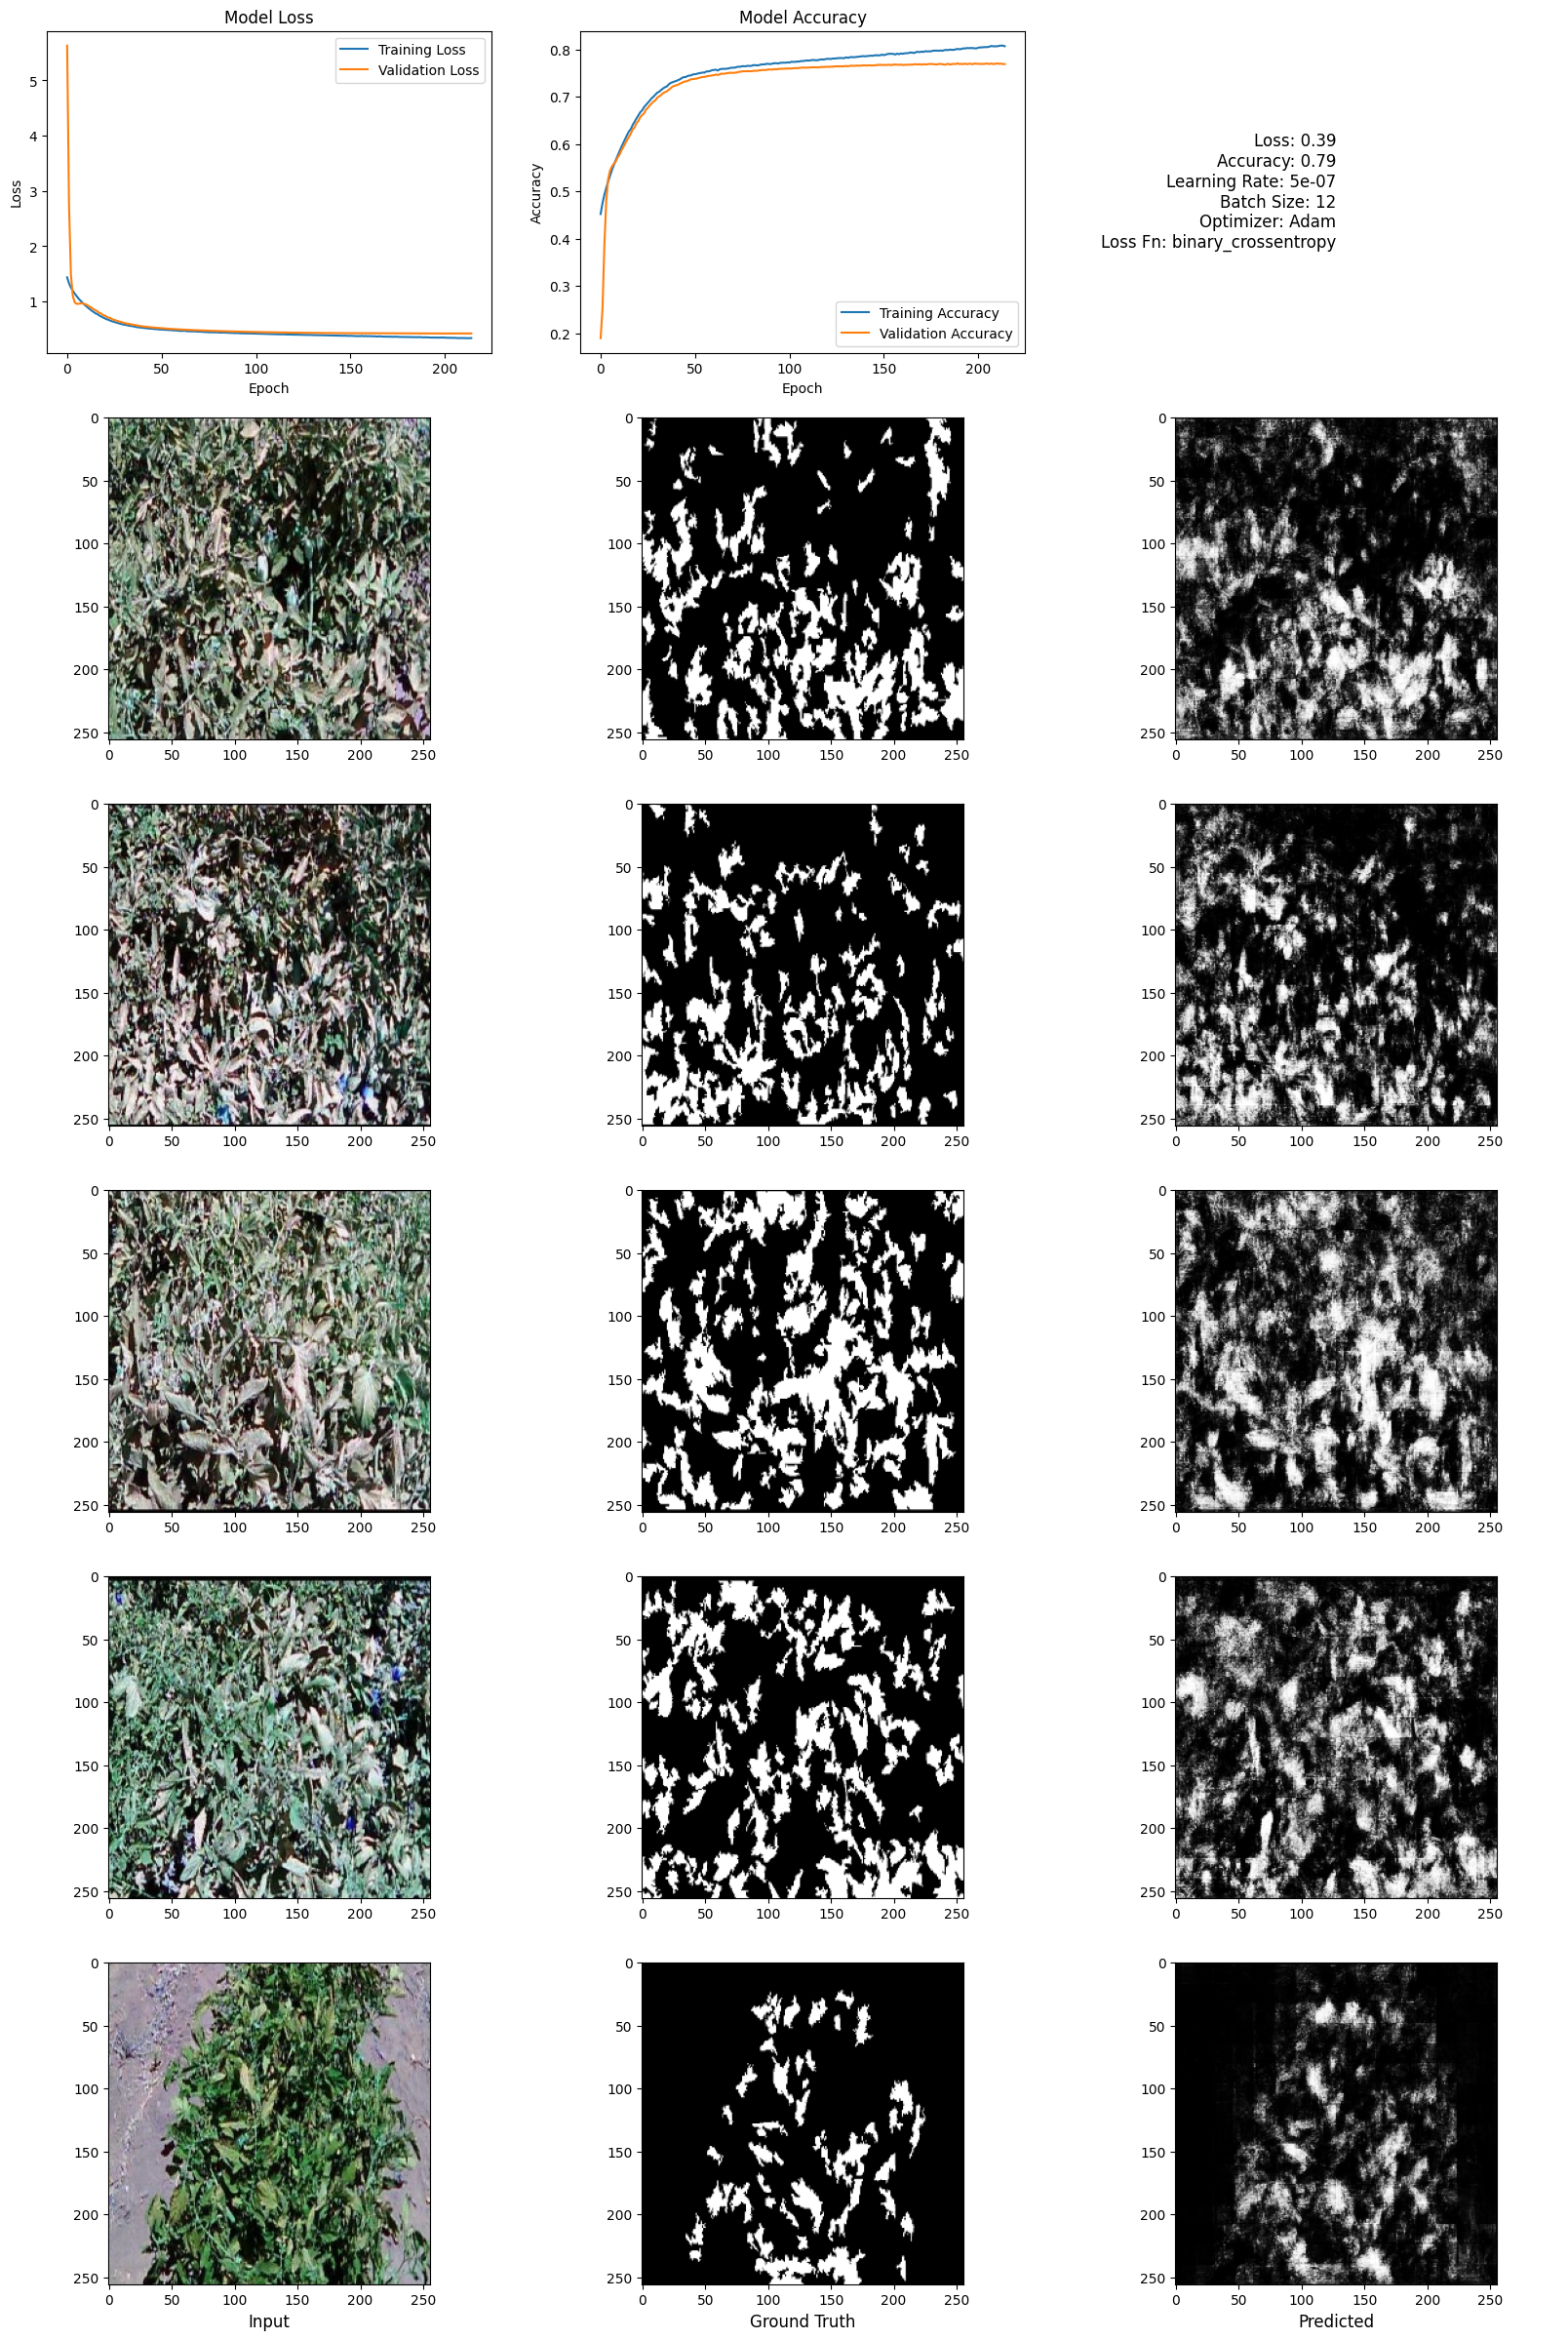

In [5]:
from src.utils import analyzer

analyzer(history, model, image_path, mask_path, test_images, test_masks, train_attr)